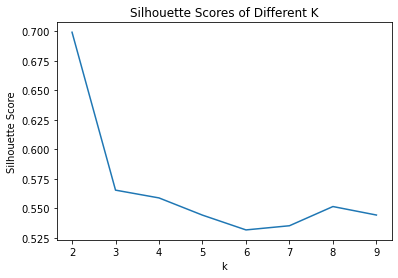

[[1.25891198e+01 1.86470974e+01 8.13681984e+01 4.99672538e+02
  9.52536263e-02 9.25628595e-02 6.45047768e-02 3.47617424e-02
  1.79291736e-01 6.36737073e-02]
 [1.96473443e+01 2.15955777e+01 1.30012353e+02 1.21191630e+03
  1.00331744e-01 1.46609254e-01 1.75985363e-01 9.97259568e-02
  1.87873207e-01 5.96535503e-02]]


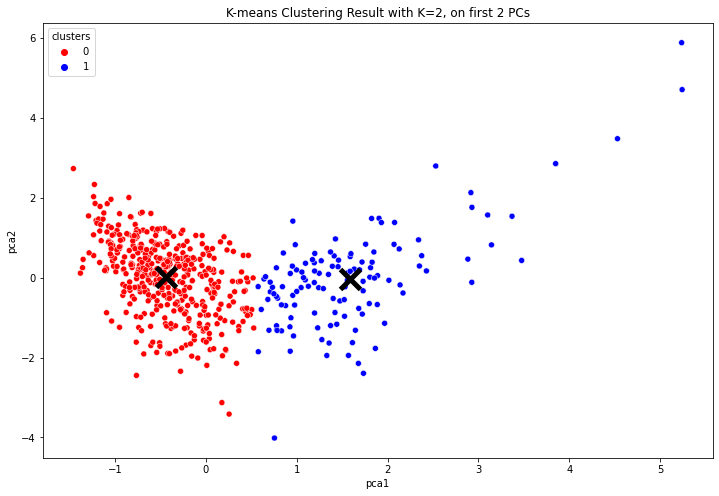

[[1.18717279e+01 1.67035765e+01 7.62268103e+01 4.44540923e+02
  9.44686978e-02 8.01806869e-02 4.72222450e-02 2.64107379e-02
  1.76622943e-01 6.37127681e-02]
 [1.48163225e+01 2.26954989e+01 9.70918420e+01 6.91680030e+02
  9.73658553e-02 1.22683915e-01 1.10971353e-01 5.85767872e-02
  1.85407325e-01 6.31061060e-02]
 [2.04821167e+01 2.01490386e+01 1.35550065e+02 1.31500305e+03
  1.00638779e-01 1.45477807e-01 1.82670156e-01 1.05500125e-01
  1.86926070e-01 5.87745052e-02]]


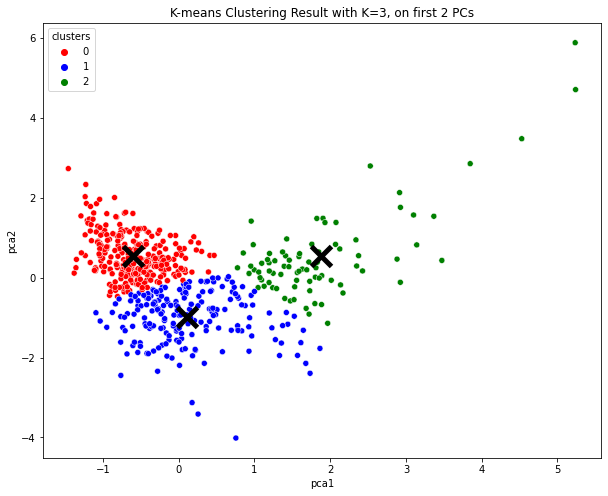

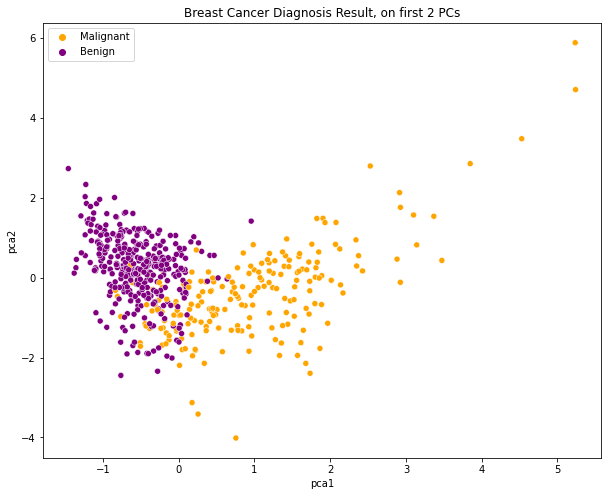

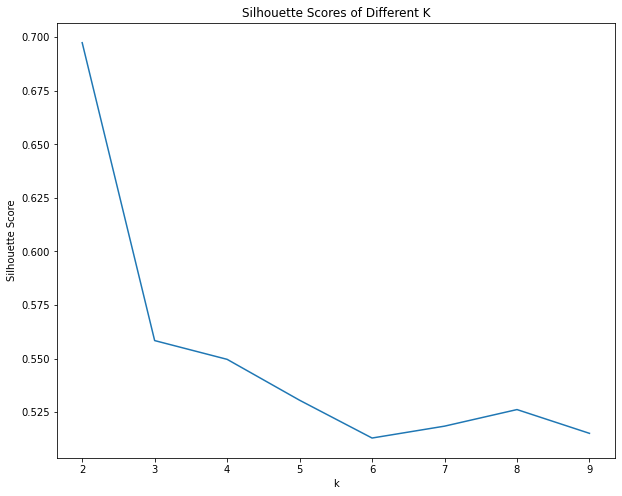

[[1.25857811e+01 1.86807193e+01 8.13570543e+01 4.99673910e+02
  9.53111452e-02 9.28197554e-02 6.48557063e-02 3.48661515e-02
  1.79426056e-01 6.37118323e-02 3.19080599e-01 1.23613737e+00
  2.24296702e+00 2.48525268e+01 7.28374698e-03 2.38669554e-02
  2.92349993e-02 1.08069710e-02 2.08614471e-02 3.83096937e-03]
 [1.96593260e+01 2.14749188e+01 1.30052345e+02 1.21191137e+03
  1.00125326e-01 1.45687329e-01 1.74725979e-01 9.93512627e-02
  1.87391170e-01 5.95167308e-02 7.14129302e-01 1.14764896e+00
  5.10215624e+00 9.59066416e+01 6.16975477e-03 3.12602085e-02
  4.14350800e-02 1.53459671e-02 1.93969682e-02 3.66547525e-03]]


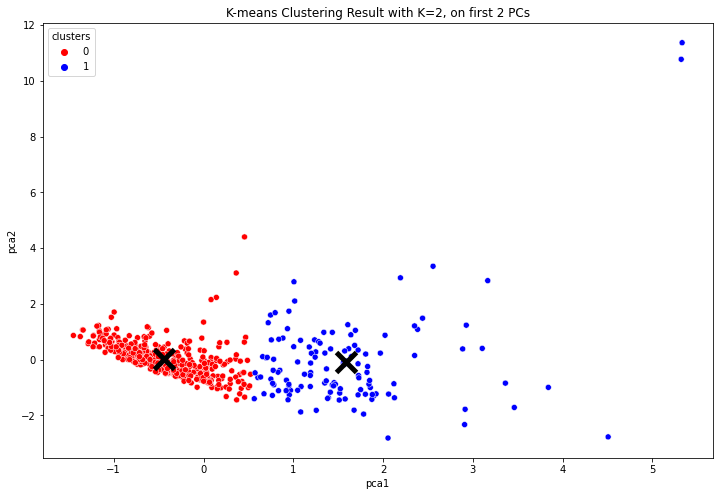

[[1.91498787e+01 2.12191675e+01 1.26400088e+02 1.14847690e+03
  9.87899424e-02 1.39191225e-01 1.61611301e-01 9.28791633e-02
  1.84947890e-01 5.92942364e-02 6.15684796e-01 1.09871404e+00
  4.39838742e+00 7.93558155e+01 5.87663377e-03 2.93394978e-02
  3.83967236e-02 1.44946964e-02 1.85370448e-02 3.44561645e-03]
 [2.87882359e+01 2.67342936e+01 1.97299484e+02 2.49925357e+03
  1.36324515e-01 2.95459302e-01 4.74288286e-01 2.38010836e-01
  2.54376548e-01 7.00148077e-02 3.34684949e+00 2.71094669e+00
  2.38918686e+01 5.34383592e+02 1.60558951e-02 8.29071524e-02
  1.22683775e-01 3.71079321e-02 4.67875796e-02 1.04817481e-02]
 [1.25052397e+01 1.86581362e+01 8.08271807e+01 4.93620067e+02
  9.54237845e-02 9.26731575e-02 6.44857271e-02 3.44414883e-02
  1.79652031e-01 6.38484589e-02 3.26437502e-01 1.24651276e+00
  2.29473452e+00 2.59800266e+01 7.35966810e-03 2.40179076e-02
  2.94618847e-02 1.08441035e-02 2.10416370e-02 3.87211132e-03]]


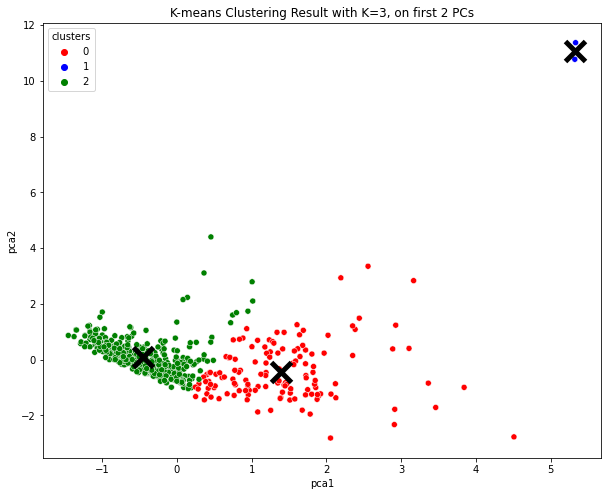

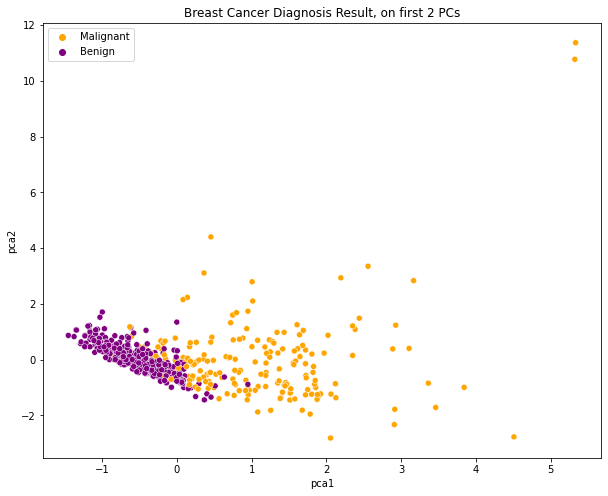

In [94]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import json

# load data
cat=['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
cat_mean = [sub + '_mean' for sub in cat]
cat_sd = [sub + '_se' for sub in cat]
cat_worst = [sub + '_worst' for sub in cat]
names = ['id', 'diagnosis'] + cat_mean + cat_sd + cat_worst
df = pd.read_csv('wdbc.csv', names=names, header=None)

# core data: only mean
# get the best k
df_sd = df.iloc[:,2:12]
df_dia = df.iloc[:,1]
sil = []
kmax = 10
for k in range(2, kmax):
  kmeans = KMeans(n_clusters = k).fit(df_sd)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_sd, labels, metric = 'euclidean'))

plt.plot(range(2,10), sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores of Different K')
plt.show()

# plot clusters on PCA plain, k=2
pca = PCA(n_components=2, whiten=True)
reduced_data = pca.fit_transform(df_sd)
kmeans = KMeans(n_clusters = 2).fit(reduced_data)
labels = kmeans.labels_
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
centers = np.array(kmeans.cluster_centers_)
# get cluster centers in raw space 
centers_raw_k2 = pca.inverse_transform(kmeans.cluster_centers_)
print(centers_raw_k2)
results['clusters'] = labels
plt.rcParams['figure.figsize'] = [12, 8]
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results, palette=['red','blue'])
for i in range(0, len(centers)):
    plt.plot(centers[i][0], centers[i][1], color='k', marker='x', markersize=20, mew=5,)
plt.title('K-means Clustering Result with K=2, on first 2 PCs')
plt.show()

#save file for App dev
#save file for App dev
results.to_csv(r'results_mean_kmeans_2.csv', header=False, index=False)
np.savetxt("results_mean_centers_2_raw.csv", centers_raw_k2, delimiter=",")
np.savetxt("results_mean_centers_2_pca.csv", centers, delimiter=",")

# plot clusters on PCA plain, k=3
pca = PCA(n_components=2, whiten=True)
reduced_data = pca.fit_transform(df_sd)
kmeans = KMeans(n_clusters = 3).fit(reduced_data)
labels = kmeans.labels_
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
centers = np.array(kmeans.cluster_centers_)
# get cluster centers in raw space 
centers_raw_k3 = pca.inverse_transform(kmeans.cluster_centers_)
print(centers_raw_k3)
results['clusters'] = labels
plt.rcParams['figure.figsize'] = [10, 8]
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results, palette=['red','blue','green'])
for i in range(0, len(centers)):
    plt.plot(centers[i][0], centers[i][1], color='k', marker='x', markersize=20, mew=5,)
plt.title('K-means Clustering Result with K=3, on first 2 PCs')
plt.show()

plt.rcParams['figure.figsize'] = [10, 8]
sns.scatterplot(x="pca1", y="pca2", hue=df_dia, data=results, palette=['orange','purple'])
plt.title('Breast Cancer Diagnosis Result, on first 2 PCs')
L=plt.legend()
L.get_texts()[0].set_text('Malignant')
L.get_texts()[1].set_text('Benign')
plt.show()

#save file for App dev
results.to_csv(r'results_mean_kmeans_3.csv', header=False, index=False)
np.savetxt("results_mean_centers_3_raw.csv", centers_raw_k3, delimiter=",")
np.savetxt("results_mean_centers_3_pca.csv", centers, delimiter=",")

# all data
# get the best k
df_sd = df.iloc[:,2:22]
df_dia = df.iloc[:,1]
sil = []
kmax = 10
for k in range(2, kmax):
  kmeans = KMeans(n_clusters = k).fit(df_sd)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_sd, labels, metric = 'euclidean'))

plt.plot(range(2,10), sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores of Different K')
plt.show()

# plot clusters on PCA plain, k=2
pca = PCA(n_components=2, whiten=True)
reduced_data = pca.fit_transform(df_sd)
kmeans = KMeans(n_clusters = 2).fit(reduced_data)
labels = kmeans.labels_
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
centers = np.array(kmeans.cluster_centers_)
# get cluster centers in raw space 
centers_raw_k2 = pca.inverse_transform(kmeans.cluster_centers_)
print(centers_raw_k2)
results['clusters'] = labels
plt.rcParams['figure.figsize'] = [12, 8]
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results, palette=['red','blue'])
for i in range(0, len(centers)):
    plt.plot(centers[i][0], centers[i][1], color='k', marker='x', markersize=20, mew=5,)
plt.title('K-means Clustering Result with K=2, on first 2 PCs')
plt.show()

#save file for App dev
results.to_csv(r'results_all_kmeans_2.csv', header=False, index=False)
np.savetxt("results_all_centers_2_raw.csv", centers_raw_k2, delimiter=",")
np.savetxt("results_all_centers_2_pca.csv", centers, delimiter=",")

# plot clusters on PCA plain, k=3
pca = PCA(n_components=2, whiten=True)
reduced_data = pca.fit_transform(df_sd)
kmeans = KMeans(n_clusters = 3).fit(reduced_data)
labels = kmeans.labels_
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
centers = np.array(kmeans.cluster_centers_)
# get cluster centers in raw space 
centers_raw_k3 = pca.inverse_transform(kmeans.cluster_centers_)
print(centers_raw_k3)
results['clusters'] = labels
plt.rcParams['figure.figsize'] = [10, 8]
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results, palette=['red','blue','green'])
for i in range(0, len(centers)):
    plt.plot(centers[i][0], centers[i][1], color='k', marker='x', markersize=20, mew=5,)
plt.title('K-means Clustering Result with K=3, on first 2 PCs')
plt.show()

plt.rcParams['figure.figsize'] = [10, 8]
sns.scatterplot(x="pca1", y="pca2", hue=df_dia, data=results, palette=['orange','purple'])
plt.title('Breast Cancer Diagnosis Result, on first 2 PCs')
L=plt.legend()
L.get_texts()[0].set_text('Malignant')
L.get_texts()[1].set_text('Benign')
plt.show()

#save file for App dev
results.to_csv(r'results_all_kmeans_3.csv', header=False, index=False)
np.savetxt("results_all_centers_3_raw.csv", centers_raw_k3, delimiter=",")
np.savetxt("results_all_centers_3_pca.csv", centers, delimiter=",")